# ResNetの学習
- MNISTの学習と乃木坂画像の学習がしたい

In [31]:
%load_ext autoreload
%autoreload 2

import os, sys
sys.path.append('../misc')
sys.path.append('/home/lab/daigo/gitclone/keras-resnet/')
sys.path.append('/home/lab/daigo/git/pyworks/Slackutil/')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.callbacks import TensorBoard
import h5py

from resnet import ResnetBuilder
from Nogi import NogiFaceImport
from SendMessage import SendMessage

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
nogi = NogiFaceImport(path='/home/data2/daigo/NogiFace/')

loading Nogizaka46 Face Data ...


In [8]:
data_nogi = nogi.load(front_only=True, 
                      image_size=(128, 128))

front only : True
H/W size : (128, 128)
grayscale : False
one hot : True
train data shape : (4896, 128, 128, 3), train label shape : (4896, 5)
test data shape : (544, 128, 128, 3), test label shape : (544, 5)


In [9]:
# handle Nogizaka46 data
(x_train, t_train), (x_test, t_test) = data_nogi

In [10]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.

In [19]:
x_train = np.transpose(x_train, (0, 3, 1, 2))
x_test = np.transpose(x_test, (0, 3, 1, 2))

In [16]:
print(x_train.shape, t_train.shape)
x_train[0]

(4896, 128, 128, 3) (4896, 5)


array([[[ 0.97254902,  0.97254902,  0.98039216],
        [ 0.97254902,  0.97254902,  0.98039216],
        [ 0.97254902,  0.97254902,  0.98039216],
        ..., 
        [ 0.94901961,  0.87058824,  0.96862745],
        [ 0.95294118,  0.87450981,  0.97254902],
        [ 0.95294118,  0.87450981,  0.97254902]],

       [[ 0.97254902,  0.97254902,  0.98039216],
        [ 0.97254902,  0.97254902,  0.98039216],
        [ 0.97254902,  0.97254902,  0.98039216],
        ..., 
        [ 0.95294118,  0.87450981,  0.97254902],
        [ 0.95294118,  0.87450981,  0.97254902],
        [ 0.95294118,  0.87450981,  0.97254902]],

       [[ 0.98039216,  0.96862745,  0.98039216],
        [ 0.98039216,  0.96862745,  0.98039216],
        [ 0.98039216,  0.96862745,  0.98039216],
        ..., 
        [ 0.95686275,  0.87058824,  0.96470588],
        [ 0.95294118,  0.87450981,  0.97254902],
        [ 0.95294118,  0.87450981,  0.97254902]],

       ..., 
       [[ 0.9254902 ,  0.75294119,  0.78431374],
        

In [11]:
batch_size = 128
nb_classes = 5
nb_epoch = 30

In [12]:
model = ResnetBuilder.build_resnet_18(input_shape=(3, 128, 128), num_outputs=5)

In [13]:
model.compile(loss = 'categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

In [14]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 3, 128, 128)   0                                            
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 64, 64)    9472        input_1[0][0]                    
____________________________________________________________________________________________________
batchnormalization_1 (BatchNorma (None, 64, 64, 64)    256         convolution2d_1[0][0]            
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 64, 64, 64)    0           batchnormalization_1[0][0]       
___________________________________________________________________________________________

In [34]:
history = model.fit(x_train, t_train,
                    batch_size=batch_size,
                    nb_epoch=10,
                    verbose=1,
                    validation_split=0.1)

Train on 4406 samples, validate on 490 samples
Epoch 1/10
4406/4406 [==============================] - 111s - loss: 0.2657 - acc: 0.9955 - val_loss: 1.1327 - val_acc: 0.6980

- バリデーション誤差がふらつく．
- 最後はそこそこ良さげな値になっているが全体的には不安定
    - バッチサイズをもう少し大きくしたら安定するかも

In [35]:
res_dir = './result/'

model.save(os.path.join(res_dir, "model.h5"))

with open(os.path.join(res_dir, 'model.json'), 'w') as json_file:
    json_file.write(model_json)
    
model.save_weights(os.path.join(res_dir, 'weight.h5'))

/home/lab/daigo/.virtualenvs/python3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


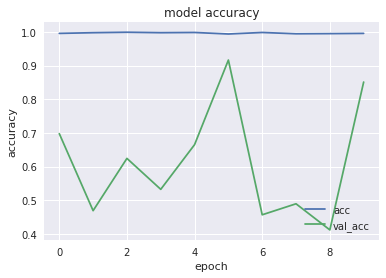

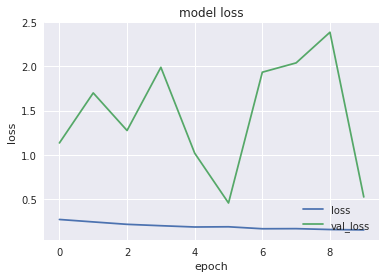

In [36]:
def plot_history(history):
    # print(history.history.keys())

    # 精度の履歴をプロット
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['acc', 'val_acc'], loc='lower right')
    plt.show()

    # 損失の履歴をプロット
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['loss', 'val_loss'], loc='lower right')
    plt.show()

# 学習履歴をプロット
plot_history(history)

In [37]:
score = model.evaluate(x_test, t_test, verbose=0)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

Test loss : 0.475956078838
Test accuracy : 0.84375
